In [69]:
import os
import sys

module_path = os.path.abspath(os.path.join('..'))

if module_path not in sys.path:
    sys.path.append(module_path)


import aurum
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [70]:
df = aurum.data.get_ohlcv('PETR4.SA')
df = aurum.ft.technical_indicators(df)

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


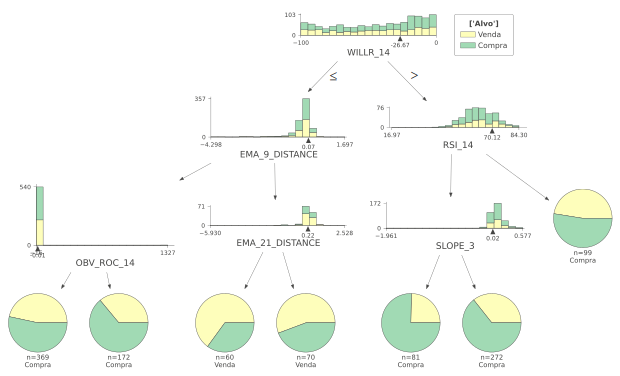

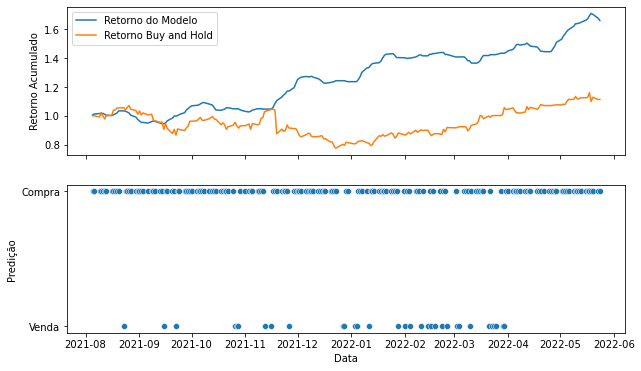

In [71]:
dt_petz = aurum.model_training.full_model_test('PETR4.SA')

In [72]:
RESULT_ARRAY = []

for i, row in df.iterrows():

    if (row.SLOPE_3 > .45) & (row.ATRr_5 <= .32) & (row.STOCHd_14_3_3 > 42.83) & (row.ATRr_5 <= .31):
        RESULT_ARRAY.append(1)
    
    elif (row.RSI_14 > 30.37) & (row.EMA_9_DISTANCE <= .32) & (row.STOCHd_14_3_3 > 42.83) & (row.ATRr_5 > .31) & (row.RSI_14 < 54.55):
        RESULT_ARRAY.append(1)

    else:
        RESULT_ARRAY.append(0)


df['PRUNNED_RESULTS'] = RESULT_ARRAY

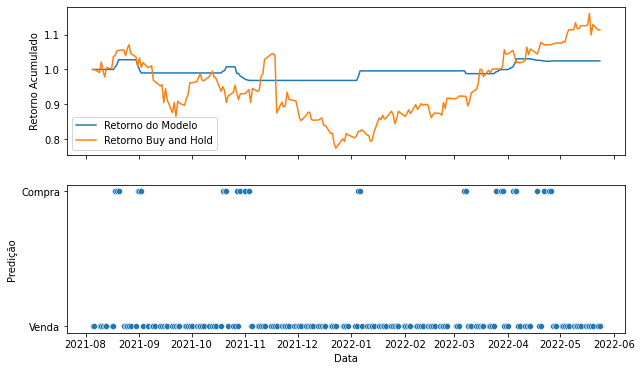

In [73]:
train_size = int(len(df) * .85)
resultados = df[train_size:].reset_index(drop=True)

resultados['RETORNO_MODELO'] = 1 + ((resultados['LEAK_Retorno']/5)* resultados['PRUNNED_RESULTS'])
resultados['RETORNO_BNH'] = 1 + ((resultados['LEAK_Retorno']/5))
resultados['RETORNO_ACUMULADO_MODELO'] = resultados['RETORNO_MODELO'].cumprod()
resultados['RETORNO_ACUMULADO_BNH'] = 1 + (df['Close'] - df.loc[0, 'Close'])/df.loc[0, 'Close']

fig, ax = plt.subplots(nrows=2, sharex=True, figsize=(10,6))
sns.lineplot(
    y=resultados['RETORNO_ACUMULADO_MODELO'],
    x=resultados['Date'],
    ax=ax[0],
    label='Retorno do Modelo'
)

sns.lineplot(
    y=resultados['RETORNO_ACUMULADO_BNH'],
    x=resultados['Date'],
    ax=ax[0],
    label='Retorno Buy and Hold'
)

ax[0].set_ylabel('Retorno Acumulado')

sns.scatterplot(
    y=resultados['PRUNNED_RESULTS'],
    x=resultados['Date'],
    ax=ax[1],
    marker='o',
    linestyle='-'
)

ax[1].set_ylabel('Predição')
ax[1].set_xlabel('Data')
ax[1].set_yticks([0, 1])
ax[1].set_yticklabels(['Venda', 'Compra'])

plt.show()


**INSIGHT**

- Transformar o problema em multiclassificação e customizar a função de decisão
    - Classes baseadas na volatilidade

---